<a href="https://colab.research.google.com/github/JakeOh/202505_BD50/blob/main/lab_da/ml18_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN(Convolution Neural Network)

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import convolve, convolve2d, correlate, correlate2d
from sklearn.datasets import load_sample_image
from sklearn.model_selection import train_test_split

import keras

# 1차원 합성곱 연산(1-D Convolution)

In [2]:
x = np.arange(1, 5)
print(x)

[1 2 3 4]


In [3]:
y = np.array([1, 2])
print(y)

[1 2]


In [5]:
y_flip = np.flip(y)
print(y_flip)

[2 1]


## convolve 함수

scipy.signal.convove 함수는 배열 y를 flip(반전)시킨 후 연산을 수행.

In [7]:
result = convolve(x, y, mode='valid')  # valid mode 합성곱 연산 -> 배열 x의 크기가 줄어듦.
print(result)

[ 4  7 10]


In [8]:
result = convolve(x, y, mode='same')  # same mode 합성곱 연산 -> x의 크기와 동일한 배열 리턴.
print(result)

[ 1  4  7 10]


In [9]:
result = convolve(x, y, mode='full')  # full mode 합성곱 연산
# -> 배열 x의 모든 원소가 합성곱 연산에 같은 비율로 참여하도록 패딩을 넣는 것.
print(result)

[ 1  4  7 10  8]


## 교차 상관(cross-correlate)

scipy.signal.correlate 함수는 배열 y를 반전시키지 않고 연산을 수행.

In [10]:
result = correlate(x, y, mode='valid')
print(result)

[ 5  8 11]


In [11]:
result = correlate(x, y, mode='same')
print(result)

[ 2  5  8 11]


In [12]:
result = correlate(x, y, mode='full')
print(result)

[ 2  5  8 11  4]


# 2차원 합성곱(2-D Convolution)

In [13]:
x = np.arange(1, 17).reshape((4, 4))
print(x)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]


In [14]:
y = np.array([[0, 1], [2, 0]])
print(y)

[[0 1]
 [2 0]]


In [15]:
y_flip = np.flip(y)
print(y_flip)

[[0 2]
 [1 0]]


## convolve2d 함수

In [16]:
result = convolve2d(x, y, mode='valid')
print(result)  #> (3, 3) shape

[[ 9 12 15]
 [21 24 27]
 [33 36 39]]


In [17]:
result = convolve2d(x, y, mode='same')
print(result)  #> (4, 4) shape

[[ 0  1  2  3]
 [ 2  9 12 15]
 [10 21 24 27]
 [18 33 36 39]]


In [18]:
 result = convolve2d(x, y, mode='full')
 print(result)  #> (5, 5) shape

[[ 0  1  2  3  4]
 [ 2  9 12 15  8]
 [10 21 24 27 12]
 [18 33 36 39 16]
 [26 28 30 32  0]]


## correlate2d 함수

In [19]:
result = correlate2d(x, y, mode='valid')
print(result)

[[12 15 18]
 [24 27 30]
 [36 39 42]]


In [20]:
result = correlate2d(x, y, mode='same')
print(result)

[[12 15 18 16]
 [24 27 30 24]
 [36 39 42 32]
 [14 15 16  0]]


In [21]:
result = correlate2d(x, y, mode='full')
print(result)

[[ 0  2  4  6  8]
 [ 1 12 15 18 16]
 [ 5 24 27 30 24]
 [ 9 36 39 42 32]
 [13 14 15 16  0]]


# 이미지 배열과 합성곱

In [32]:
china = load_sample_image('china.jpg')

In [33]:
china.shape

(427, 640, 3)

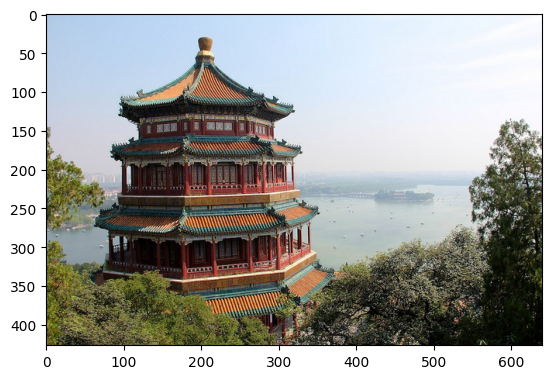

In [34]:
plt.imshow(china)
plt.show()

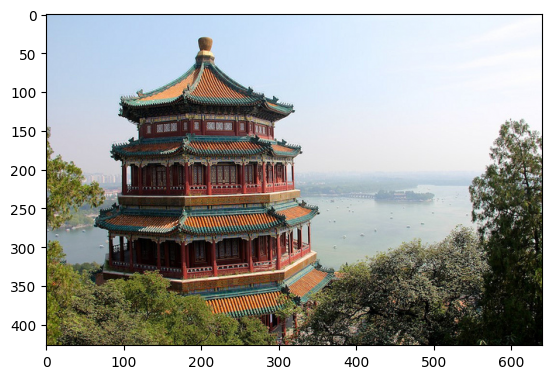

In [39]:
china_cp = china.copy() / 255.0  # 0 ~ 255 범위를 0 ~ 1 범위로 스케일링
plt.imshow(china_cp)
plt.show()

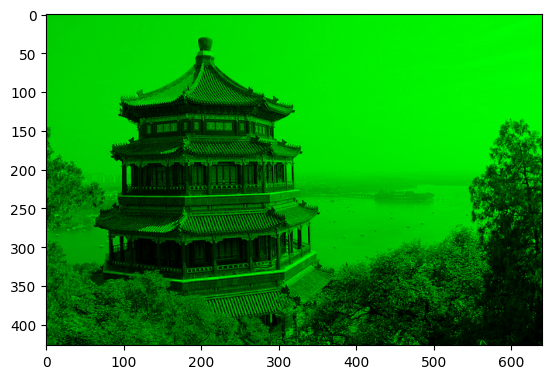

In [40]:
china_cp[:, :, [0, 2]] = 0
plt.imshow(china_cp)
plt.show()

In [41]:
filter = np.zeros(shape=(3, 3, 3))
filter[:, :, 1] = 1
result = convolve(china_cp, filter, mode='same')
print(result.shape)

(427, 640, 3)


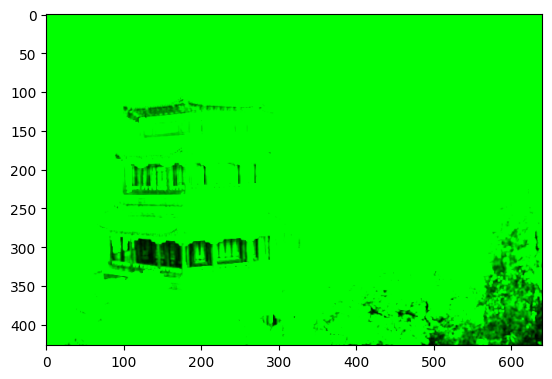

In [42]:
plt.imshow(result)
plt.show()